# Classification Analysis of the Titanic Dataset (Midterm Project)
**Author:** Jarred Gastreich 
**Date:** November, 2, 2025 
**Objective:** This project tests multiple models that classify data for decision-making. The Titanic Dataset predicts survival on Titantic via multiple features.


## Import External Python Libraries

In [204]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix

# Section 1. Import and Inspect Data

### 1.1 Load the dataset and display the first 10 rows.

In [205]:
# 1. Load the dataset
titanic = sns.load_dataset('titanic')



In [206]:
# Load dataset
titanic = sns.load_dataset('titanic')

# Display a few records to verify
titanic.head(10)

# --- Define the Absolute Path using a raw string ---
folder_path = r'C:\Repos\ml-modules\data'
file_name = 'titanic_raw.csv'

# full_path is now the exact location
full_path = os.path.join(folder_path, file_name)

# Ensure the directory exists (and create it if it doesn't)
# This uses the absolute path, guaranteeing success if you have permissions.
os.makedirs(folder_path, exist_ok=True) 

# Load the dataset
titanic = sns.load_dataset('titanic')

# Save the DataFrame
titanic.to_csv(full_path, index=False)

print(f"Dataset successfully saved to: {full_path}")

Dataset successfully saved to: C:\Repos\ml-modules\data\titanic_raw.csv


### 1.2 Check for missing values and display summary statistics

In [207]:
print("--- Missing Values Summary ---")
print(titanic.isnull().sum())

--- Missing Values Summary ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [208]:
print("\n--- Numerical Summary Statistics ---")
print(titanic.describe())

print("\n--- Categorical Summary Statistics ---")
print(titanic.describe(include='object'))


--- Numerical Summary Statistics ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

--- Categorical Summary Statistics ---
         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          

In [209]:
# Use .value_counts() on the 'pclass' column
pclass_counts = titanic['pclass'].value_counts()

# Display the results
print(pclass_counts)

pclass
3    491
1    216
2    184
Name: count, dtype: int64


## Reflection 1

#### What do you notice about the dataset? Are there any data issues?

**The first thing to be aware of with the missing values is that "age" and "deck" have significant missing values. We could use imputation techniques to estimate the missing values, or we may be deam the features necessary in the analysis.

There's also outlier issues regarding "fare". The mean fare is much higher than the median fare. This does not concern me too much due to the nature of the Titanic being which had low income and higher income passengers.

The other issue is that some features contain low-value information or they are in a format that is not usable for machine learning models. Name is a string. Sex (male/female) can be converted to numerical format. We will likely drop "ticket" because it has many unique value
**

# Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

...


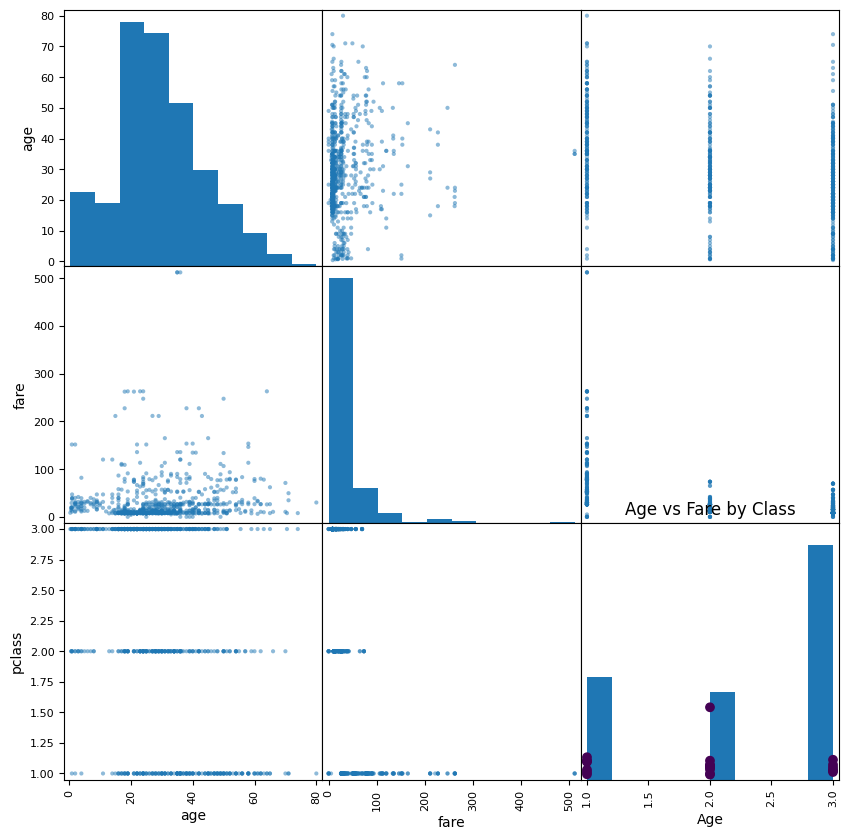

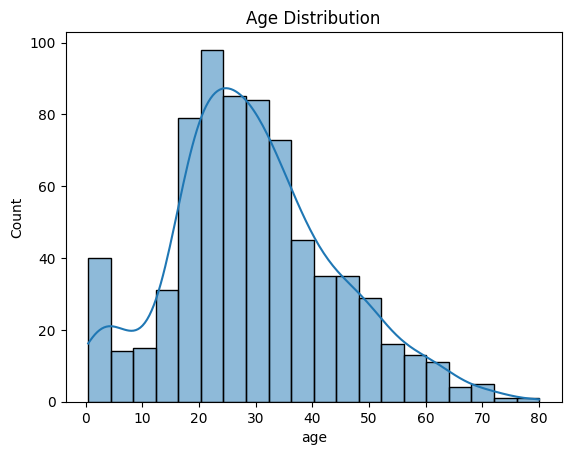

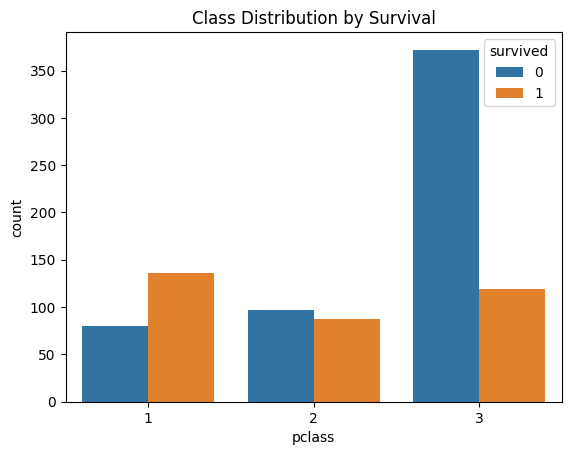

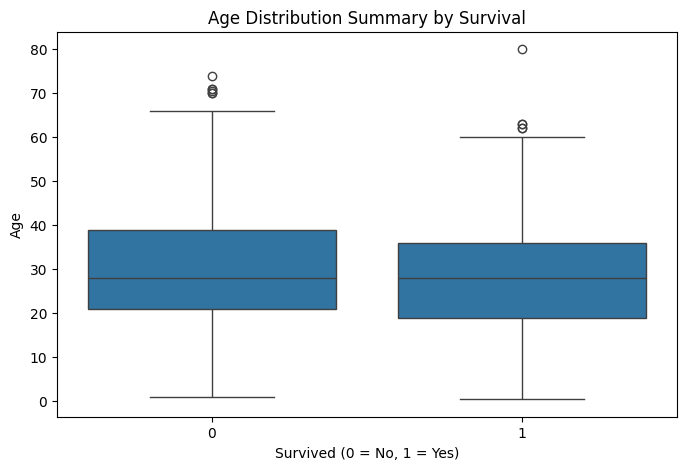

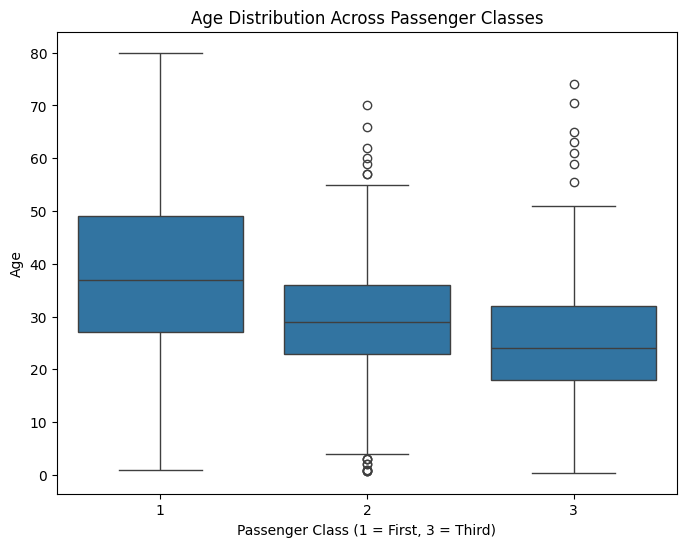

In [210]:
attributes = ['deck', 'age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

print("...")

#Create a scatter plot of age vs fare by gender
plt.scatter(titanic['age'], titanic['fare'], c=titanic['pclass'].apply(lambda x: 0 if x == '3' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Class')
plt.show()

#Create a histogram of age:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Create a count plot for class and survival
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

#Create a boxplot to show relationship between age and survival
plt.figure(figsize=(8, 5))
# 'x' is the binary survival column, and 'y' is the continuous age column
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution Summary by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

#Create a boxplot to show relationship between age and passenger class
plt.figure(figsize=(8, 6))
# 'x' is the categorical variable (pclass), and 'y' is the continuous variable (age)
sns.boxplot(x='pclass', y='age', data=titanic)

plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class (1 = First, 3 = Third)')
plt.ylabel('Age')
plt.show()

### 2.2 Handle missing values and clean data

Instead of finding averages to fill the missing age values, we can use signifiers to anticipate the ages based on other features.


Missing Age values after imputation:
0


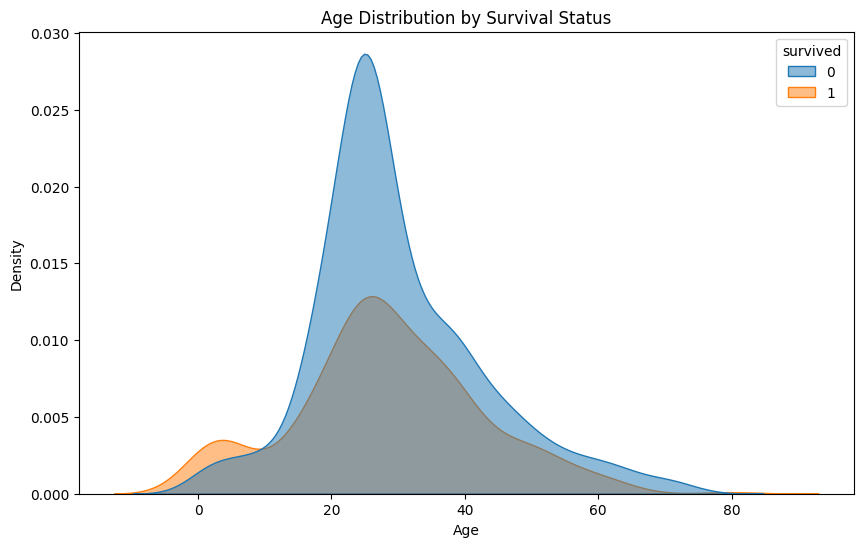

In [211]:
# Use pclass to impute missing age values.

# Calculate the mean age for each pclass and use it to fill NaN values
titanic['age'] = titanic['age'].fillna(
    titanic.groupby('pclass')['age'].transform('mean')
)

# Verify that there are now fewer missing Age values
print("Missing Age values after imputation:")
print(titanic['age'].isnull().sum())
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

#Create a new plot to represent age and survival relation with all age values filled
plt.figure(figsize=(10, 6))
# This creates a smooth curve for the age distribution, separated by the 'survived' status
sns.kdeplot(
    data=titanic, 
    x='age', 
    hue='survived', 
    fill=True, 
    alpha=.5 
)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.show()


In [212]:
#Clean embark town 
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)


# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

### 2.3 Feature selection and engineering

In [213]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Create the feature: 1 if FamilySize is 1 (alone), 0 otherwise
titanic['is_alone'] = (titanic['family_size'] == 1).astype(int)


### Reflection 2
#### What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

I used the visuals to investigate the relationship between age and survival. The boxplot for the relationship between age and survival surprisingly was not very helpful. It shows that he median age is very slightly higher for those who did not survive. It's helpful to see the age dispersion visual to acknowledge that significantly more passengers were between 20 and 30 years old. Next, it was helpful to see if there was a relationship between age and pclass nad this is more significant because it showed that 1st class were quite a bit older on average -- older than 30 years old, on average. It's important to note that these visuals were run before the age feature has been transformed. 

To impute the missing age values, I noticed that the class of passengers had different median ages, so I used the median age of each class and filled in the missing age values based on that.

I noticed on the age/survial visual that there is a spike in infants and toddlers who survived which makes me assume that. This also leads to the creation of the new isalone feature because it's assumed that being alone decreases survival.

# Section 3. Feature Selection & Justification

### Section 3.1 Choose features and target
'survived' will be the target variable, which is a classification problem.

Input features will be categorical for classification and numerical for regression.
'sex' will be used because of the protocol on the titantic: "women and children first".
'pclass' showed strong prediction in previous analysis
'age' is relevant because we saw spikes for children in visuals.
'fare' is relavent because higher fares usually meant cabin closer to the top deck

### Section 3.2 Define X and y

In [214]:
# The target variable (y)
y = titanic['survived']

# Case 1: Features = Pclass + Sex
# Select the features 'pclass' and 'sex' as input
X1 = titanic[['pclass', 'sex']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

print(f"Case 1 (pclass, sex) has {len(X1)} rows.")

# Case 2: Feature = age (drop if na)
# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

print(f"Case 2 (age) has {len(X2)} rows after dropping {len(titanic) - len(X2)} NaNs.")

# Case 3: Features = Age + Pclass (drop if na)
# Select both 'age' and 'pclass', and drop rows where missing (na)
X3 = titanic[['age', 'pclass']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

print(f"Case 3 (age, pclass) has {len(X3)} rows.")

# Case 4: Features = All Core (pclass, sex, age, fare)
core_features = ['pclass', 'sex', 'age', 'fare']

# Select all core features and drop any row with missing data (only affects 'age' here)
X4 = titanic[core_features].dropna()

# Select the corresponding 'survived' values for those rows
y4 = titanic.loc[X4.index, 'survived']

print(f"Case 4 (All Core) has {len(X4)} rows.")

Case 1 (pclass, sex) has 891 rows.
Case 2 (age) has 891 rows after dropping 0 NaNs.
Case 3 (age, pclass) has 891 rows.
Case 4 (All Core) has 891 rows.


### Reflection 3
#### Why did you choose these features? How might they impact predictions or accuracy?

The target variable is survived because we will determine if there are any factors influencing passengers who survived.

The input variables will be sex, age, pclass, and fare.

'sex' will be used because of the protocol on the titantic: "women and children first".
'pclass' showed strong prediction in previous analysis
'age' is relevant because we saw spikes for children in visuals.
'fare' is relavent because higher fares usually meant cabin closer to the top deck

# Section 4. Train a Model: Random Forest

### 4.1 Split the data into training and test sets

In [215]:
# X4 (features: pclass, sex, age, fare) and y4 (target: survived)
# are assumed to be ready with no missing values (age NaNs dropped).

# --- 1. Prepare Final Feature Array (X_final) ---
# Since all features are numerical, we just convert the DataFrame to a NumPy array.
X_final_array = X4.values 
y_array = y4.values

# --- 2. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_final_array, 
    y_array, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_array
)

print("--- Data Split Summary (All Features Numerical) ---")
print(f"Total samples used: {X_final_array.shape[0]}")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

--- Data Split Summary (All Features Numerical) ---
Total samples used: 891
Training set size: 712 samples
Testing set size: 179 samples
Number of features: 4


### 4.2 Train model using Sckit-Learn model.fit() method

In [216]:
# 1. Initialize the model
# Using 100 trees (n_estimators=100) and setting random_state for reproducibility.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
# The model learns the relationship between the features (X_train) 
# and the target (y_train).
print("Starting Random Forest Classifier training...")
model.fit(X_train, y_train)
print("Training complete! Model is now fitted to the data.")

Starting Random Forest Classifier training...
Training complete! Model is now fitted to the data.


### 4.3 Evaluate performance


### Model Performance Metrics ###
Accuracy:  0.8324 (Overall correct predictions)
Precision: 0.8000 (Of all predicted survivors, how many actually survived)
Recall:    0.7536 (Of all actual survivors, how many did the model find)
F1-Score:  0.7761 (A balance between Precision and Recall)


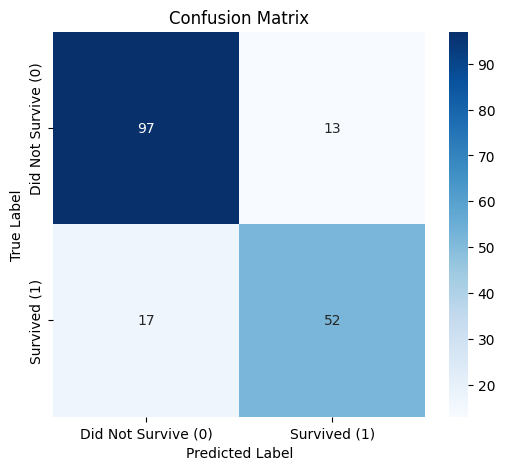

In [217]:
# --- 1. Make Predictions ---
# Use the trained model to predict the target for the test features
y_pred = model.predict(X_test)

# --- 2. Calculate Core Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n### Model Performance Metrics ###")
print(f"Accuracy:  {accuracy:.4f} (Overall correct predictions)")
print(f"Precision: {precision:.4f} (Of all predicted survivors, how many actually survived)")
print(f"Recall:    {recall:.4f} (Of all actual survivors, how many did the model find)")
print(f"F1-Score:  {f1:.4f} (A balance between Precision and Recall)")

# --- 3. Display the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Survive (0)', 'Survived (1)'], 
            yticklabels=['Did Not Survive (0)', 'Survived (1)'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Reflection 4
#### How well did the model perform? Any surprises in the results?

The model performed quite well. With 83.24% accuracy, it is generally correct. There is a trade off between precision (.80) and recall (.75). The model is slightly more reliable when it predicts someone will survive with an 80% of being right. It's also slightly less effective at finding every single person who actually survived (it missed 25% of true survivors, false negatives). 

That said, it is suprising how close the precision and recall are, by .05 points. 

# Section 5. Try a different Model: Decision Tree

### Train the Decision Tree Model

In [218]:
# 1. Initialize the Decision Tree model
# Setting random_state for reproducibility. We will use default parameters for simplicity.
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model using the training data
print("Starting Decision Tree Classifier training...")
dt_model.fit(X_train, y_train)
print("Training complete! Decision Tree model is fitted.")

# 3. Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

Starting Decision Tree Classifier training...
Training complete! Decision Tree model is fitted.


### Evaluate Decision Tree Performance


### Decision Tree Performance Metrics ###
Accuracy:  0.8212
Precision: 0.7846
Recall:    0.7391
F1-Score:  0.7612


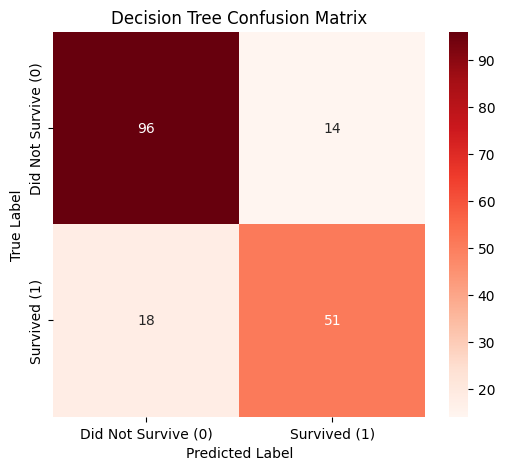

In [219]:
# Calculate core metrics
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

print("\n### Decision Tree Performance Metrics ###")
print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")

# Display the Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Did Not Survive (0)', 'Survived (1)'], 
            yticklabels=['Did Not Survive (0)', 'Survived (1)'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Reflection 5:
#### Which model performed better? Why might one classifier be more effective in this specific case?

The Random Forest model (83% accuracy) performed better than the Decision Tree model ((82% accuracy)).This might be the case because the Decision Tree can easily become too specific and it may learn from noise and outliers -- overfitting. 

# Section 6. Final Thoughts & Insights

#### 6.1 Summarize findings.
This model successfully identified strong predictors of survival on the titanic and defended its perfmance based on accuracy, recall and precision. 

The most influential factors determing survival were Passenger Class and Sex, confirming the line from the movie, "women and children first", as well as the role socioeconomic status played which was also accurately portrayed in the movie.

#### 6.2 Discuss challenges faced.

Some challenges were the missing data in age and non-numerical variables that had to be engineered. Another challenge was the overfitting of the Decision Tree model.

#### 6.3 If you had more time, what would you try next?

If I had more time, I would like to transform the fare feature to reduce the skew and make it's distribution more normal.

## Reflection 6: What did you learn from this project?

This project was by far the most practical and indepth project I have done in this program. The whole classification task was new to me. I learned the importance of numerical variables for machine learning, how to impute based on practical knowledge instead of just averaging, how to split the data for train and test, why it's important to compare models (overfitting), and how to evaluate the metics based on precision, accuracy and recall. I'm much more confident handling data outside of a excel spreadsheet. 